**Rock** vs **mine** prediction

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
%matplotlib inline

In [103]:
df = pd.read_csv('/sonar.csv',header=None)

In [104]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [105]:
df.shape

(208, 61)

In [106]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [107]:
df.isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
56,0
57,0
58,0
59,0


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [109]:
counts = df[60].value_counts()

In [110]:
counts

,count
60,
M,111
R,97


In [111]:
df.duplicated().sum()

np.int64(0)

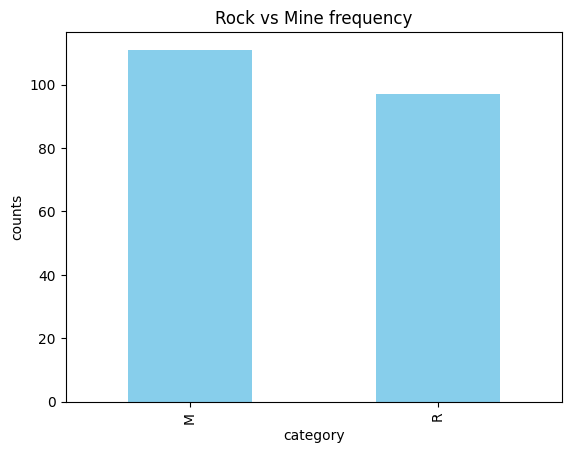

In [112]:
counts.plot(kind = "bar" ,color = 'skyblue' )
plt.title("Rock vs Mine frequency")
plt.xlabel("category")
plt.ylabel("counts")
plt.show()

split the dependent and independent values

In [113]:
X = df.drop(columns=60,axis=1)
Y = df[60]

In [114]:
print(X.shape)
print(Y.shape)

(208, 60)
(208,)


**train** **test** split

In [115]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [116]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(187, 60) (21, 60) (187,) (21,)


In [117]:
X_train.shape

(187, 60)

In [118]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
113,0.0283,0.0599,0.0656,0.0229,0.0839,0.1673,0.1154,0.1098,0.1370,0.1767,...,0.0109,0.0147,0.0170,0.0158,0.0046,0.0073,0.0054,0.0033,0.0045,0.0079
25,0.0201,0.0026,0.0138,0.0062,0.0133,0.0151,0.0541,0.0210,0.0505,0.1097,...,0.0072,0.0108,0.0070,0.0063,0.0030,0.0011,0.0007,0.0024,0.0057,0.0044
116,0.0094,0.0333,0.0306,0.0376,0.1296,0.1795,0.1909,0.1692,0.1870,0.1725,...,0.0216,0.0153,0.0112,0.0241,0.0164,0.0055,0.0078,0.0055,0.0091,0.0067
171,0.0179,0.0136,0.0408,0.0633,0.0596,0.0808,0.2090,0.3465,0.5276,0.5965,...,0.0086,0.0123,0.0060,0.0187,0.0111,0.0126,0.0081,0.0155,0.0160,0.0085
64,0.0071,0.0103,0.0135,0.0494,0.0253,0.0806,0.0701,0.0738,0.0117,0.0898,...,0.0252,0.0043,0.0048,0.0076,0.0124,0.0105,0.0054,0.0032,0.0073,0.0063


In [119]:
print(Y_train.shape)

(187,)


In [120]:
print(Y_train.head())

113    M
25     R
116    M
171    M
64     R
Name: 60, dtype: object


# Model training(feeding data)

In [121]:
model = LogisticRegression()

In [122]:
model.fit(X_train,Y_train)

LogisticRegression()

# Model evaluation

**on training data**

In [123]:
X_train_predict = model.predict(X_train)
X_train_accuracy = accuracy_score(X_train_predict,Y_train)

In [124]:
X_train_accuracy

0.8181818181818182

**on tesing data**

In [125]:
X_test_predict = model.predict(X_test)
X_test_accuracy = accuracy_score(X_test_predict,Y_test)

In [126]:
X_test_accuracy

0.9047619047619048

In [127]:
data =(0.0712,0.0901,0.1276,0.1497,0.1284,0.1165,0.1285,0.1684,0.1830,0.2127,0.2891,0.3985,0.4576,0.5821,0.5027,0.1930,0.2579,0.3177,0.2745,0.6186,0.8958,0.7442,0.5188,0.2811,0.1773,0.6607,0.7576,0.5122,0.4701,0.5479,0.4347,0.1276,0.0846,0.0927,0.0313,0.0998,0.1781,0.1586,0.3001,0.2208,0.1455,0.2895,0.3203,0.1414,0.0629,0.0734,0.0805,0.0608,0.0565,0.0286,0.0154,0.0154,0.0156,0.0054,0.0030,0.0048,0.0087,0.0101,0.0095,0.0068)

In [128]:
dnp=np.asarray(data)

In [129]:
dreshaped = dnp.reshape(1,-1)

In [130]:
prediction = model.predict(dreshaped)

In [131]:
prediction

array(['M'], dtype=object)

In [132]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
113,0.0283,0.0599,0.0656,0.0229,0.0839,0.1673,0.1154,0.1098,0.1370,0.1767,...,0.0109,0.0147,0.0170,0.0158,0.0046,0.0073,0.0054,0.0033,0.0045,0.0079
25,0.0201,0.0026,0.0138,0.0062,0.0133,0.0151,0.0541,0.0210,0.0505,0.1097,...,0.0072,0.0108,0.0070,0.0063,0.0030,0.0011,0.0007,0.0024,0.0057,0.0044
116,0.0094,0.0333,0.0306,0.0376,0.1296,0.1795,0.1909,0.1692,0.1870,0.1725,...,0.0216,0.0153,0.0112,0.0241,0.0164,0.0055,0.0078,0.0055,0.0091,0.0067
171,0.0179,0.0136,0.0408,0.0633,0.0596,0.0808,0.2090,0.3465,0.5276,0.5965,...,0.0086,0.0123,0.0060,0.0187,0.0111,0.0126,0.0081,0.0155,0.0160,0.0085
64,0.0071,0.0103,0.0135,0.0494,0.0253,0.0806,0.0701,0.0738,0.0117,0.0898,...,0.0252,0.0043,0.0048,0.0076,0.0124,0.0105,0.0054,0.0032,0.0073,0.0063
